## Problem 3: How many people live under the dominance area of each shopping center? (additional 5 points available!)

Find out how many people live under the dominance area of each shopping center. 

- Check out week 3 materials for reading in population grid from [HSY wfs](https://www.hsy.fi/fi/asiantuntijalle/avoindata/karttapalvelu/Sivut/Avoimet-rajapinnat.aspx).
- Aggregate your dominance areas into a unified geometries using [`dissolve()`](http://geopandas.org/aggregation_with_dissolve.html#dissolve-example) -function in Geopandas before joining with the population data
- Make the spatial join using `intersect`as the condition

You can freely organize your code into the code cells below.



In [5]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format).
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS',
              version='2.0.0',
              request='GetFeature',
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018',
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

# rename columns
pop.rename(columns={'asukkaita':'pop18'}, inplace=True)

# keep selected columns
pop = pop[['pop18', 'geometry']]

# define crs based on prior knowledge
pop.crs = CRS.from_epsg(3879).to_wkt()

print(pop.crs)

PROJCRS["ETRS89 / GK25FIN",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Finland Gauss-Kruger zone 25",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",25,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",1,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",25500000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["northing (N)",north,ORDER[1],LENGTHUNIT["metre",1]],AXIS["easting (E)",east,ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["unknown"],AREA["Finland - 24.5°E to 25.5°E onshore nominal"],BBOX[59.94,24.5,68.9,25.5]],ID["EPSG",3879

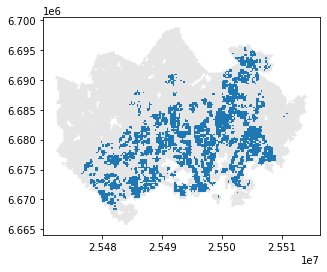

In [12]:
# read grid file
f_path = r'Dominance_areas.shp'
grid = gpd.read_file(f_path)

# set crs
grid.crs = CRS.from_epsg(3067).to_wkt()

# project grid crs to pop crs
grid = grid.to_crs(pop.crs)

# confirm that both datasets can be spatially overlayed 
ax = grid.plot(facecolor='grey', alpha=0.2)
pop.plot(ax=ax);

In [14]:
# dissolve grid based on mall variable
dissolved_grid = grid.dissolve(by='dominant_s')


In [17]:
# make a spatial join (as both data files have no common keys)
joined = gpd.sjoin(dissolved_grid, pop, how='inner', op='contains')

# calculate pop captured by each mall area
pop_captured_by_malls = joined.groupby('dominant_s')['pop18'].sum()

pop_captured_by_malls.head(7)

dominant_s
pt_r_t_Dixi          150422
pt_r_t_Forum         177967
pt_r_t_IsoOmena      145683
pt_r_t_Itis          175524
pt_r_t_Jumbo          34064
pt_r_t_Myyrmanni     157803
pt_r_t_Ruoholahti     49693
Name: pop18, dtype: int64

Remember to print the answers in this notebook :)

### Extra bonus task

Repeat problem 2 and 3 for car accessibility! No extra points available for this, but you can for example start thinking if you want to make the final assignment related to this topic :)